In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

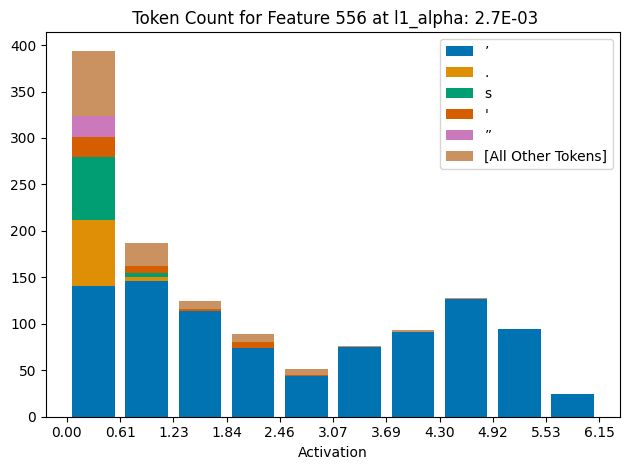

In [5]:


filename = "images/2.7E-03_556.pkl"
with open(filename, 'rb') as f:
    all_variables = pickle.load(f)
r, barWidth, bin_boundaries, data, title = all_variables
token_dict, misc_count, max_tokens, max_text = data
colors = sns.color_palette('colorblind', len(max_tokens) + 1)
running_sum = np.zeros(len(bin_boundaries) - 1)
for i in range(len(max_tokens)):
    token_id_name = max_tokens[i]
    token_count_array = token_dict[token_id_name]
    text_label = max_text[i]
    plt.bar(r, token_count_array, bottom=running_sum, label=text_label, color=colors[i], width=barWidth)
    running_sum += token_count_array
plt.bar(r, misc_count, bottom=running_sum, label='[All Other Tokens]', color=colors[-1], width=barWidth)
plt.title(title)
plt.xlabel('Activation')
plt.xticks(bin_boundaries, [f"{val:.2f}" for val in bin_boundaries])
plt.legend()
plt.tight_layout()
plt.show()